In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Churn_Modelling.csv')

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
df.shape

(10000, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
df.duplicated().sum()

np.int64(0)

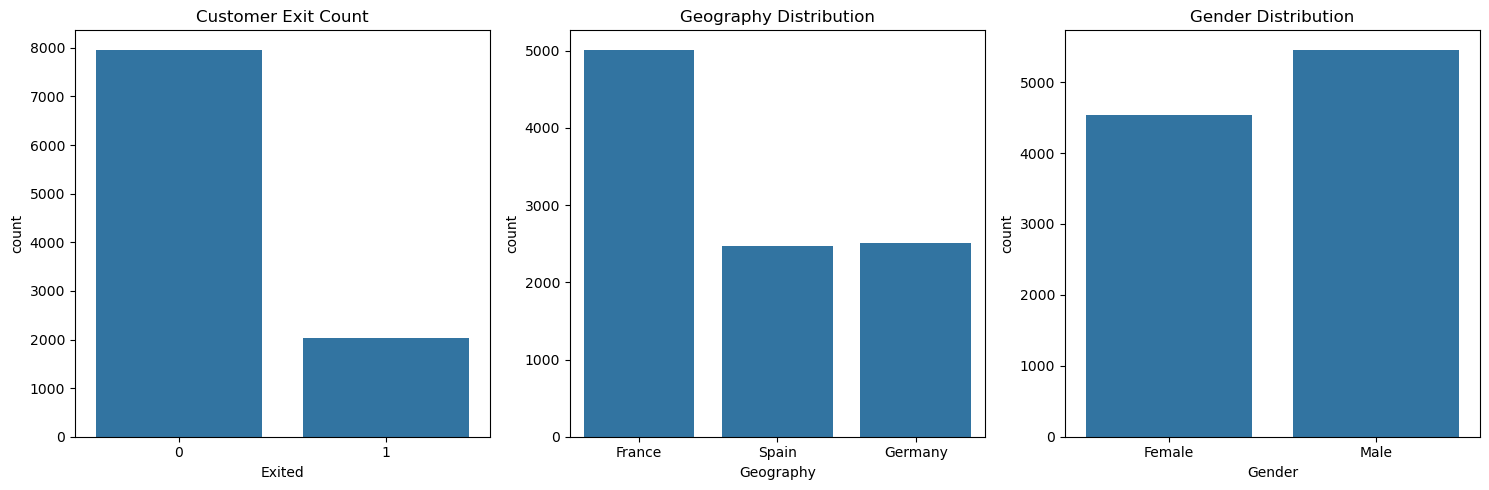

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Exited
sns.countplot(data=df, x='Exited', ax=axes[0])
axes[0].set_title('Customer Exit Count')

# Plot 2: Geography
sns.countplot(data=df, x='Geography', ax=axes[1])
axes[1].set_title('Geography Distribution')

# Plot 3: Gender
sns.countplot(data=df, x='Gender', ax=axes[2])
axes[2].set_title('Gender Distribution')

# Adjust spacing
plt.tight_layout()
plt.show()

In [59]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [60]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [62]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3369,703,33,8,190566.65,1,1,1,79997.14,0,0,0,0
2734,641,37,7,62974.64,2,0,1,39016.43,0,1,0,0
3591,769,29,2,123757.52,2,1,0,84872.66,0,0,0,1
3067,806,31,10,138653.51,1,1,0,190803.37,0,1,0,1
2848,850,41,5,0.00,2,1,1,34827.43,0,0,0,0


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.loc[:,df.columns[df.columns!='Exited']]
y = df.loc[:,'Exited']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

In [67]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [68]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [69]:
model = Sequential()

# input_layer + first hidden layer
model.add(Dense(3,activation='sigmoid',input_dim=11))

# output layer
model.add(Dense(1,activation='sigmoid'))

C:\Users\thala\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [44]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3991
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3987
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3982
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3978
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3973
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3969
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3966
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3962
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3958
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3955
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3952
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3949
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3946
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3943
Epoch 15/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1

In [45]:
model.layers[0].get_weights()

[array([[-3.22554596e-02,  8.52551195e-04,  2.26339817e-01],
        [ 6.45853460e-01, -3.25322866e-01, -3.91992044e+00],
        [ 1.90878659e-01,  6.59234896e-02, -8.32394976e-03],
        [ 1.18373358e+00, -7.72127151e-01, -2.17383280e-01],
        [ 4.70396996e+00, -1.32472646e+00, -8.19352984e-01],
        [ 2.94492561e-02,  6.57724291e-02, -1.29400834e-01],
        [ 9.83991802e-01,  1.07685256e+00, -5.47983170e-01],
        [-1.68316230e-01,  4.91004065e-02,  8.38686079e-02],
        [-1.05881000e+00, -2.84858435e-01, -1.52372625e-02],
        [ 2.25874230e-01, -2.67695278e-01,  9.95604321e-02],
        [ 1.80186659e-01,  4.51151580e-01,  8.16538334e-02]], dtype=float32),
 array([2.1155043, 1.5401934, 0.4504004], dtype=float32)]

In [46]:
model.layers[1].get_weights()

[array([[-2.6572087],
        [-2.510229 ],
        [-2.4384701]], dtype=float32),
 array([3.1432278], dtype=float32)]

In [47]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [48]:
y_log

array([[0.07729524],
       [0.10148802],
       [0.3089815 ],
       ...,
       [0.5535641 ],
       [0.14691497],
       [0.28577262]], dtype=float32)

In [49]:
y_pred = np.where(y_log>=0.5,1,0)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.8495